# Vascular Endothelium 

Install Packages read in datasets and only use overlapping genes.

In [1]:
! pip install scanpy
! pip install scProject -U
import scProject
import scanpy as sc
patterns = sc.read_h5ad('patterns_anndata.h5ad')
dataset = sc.read_h5ad('test_target.h5ad')
dataset_filtered, patterns_filtered = scProject.matcher.filterAnnDatas(dataset, patterns, 'gene_id')

Requirement already up-to-date: scProject in /Users/asherbaraban/opt/anaconda3/lib/python3.7/site-packages (1.0.9.7)
(55371, 428) dataset filter shape
(80, 428) patterns filter shape


Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.


Below, we perfrom a regression with .001 weight of regularization and 1% lasso to encourage as many features to show up. Then, with potential features identified, we can establish their robustness by increasing features.

(55371, 80)
[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


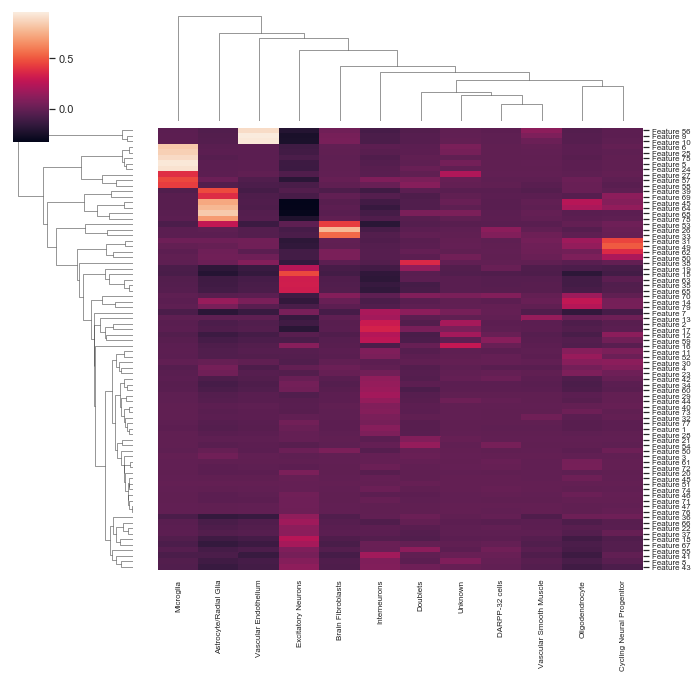

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= [10, 12]
scProject.rg.NNLR_ElasticNet(dataset_filtered, patterns_filtered, 'VascEndo', .001, .01)
scProject.viz.pearsonMatrix(dataset_filtered, patterns_filtered, 'CellType', 12, 'VascEndo', 'PearsVasc', True)

[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


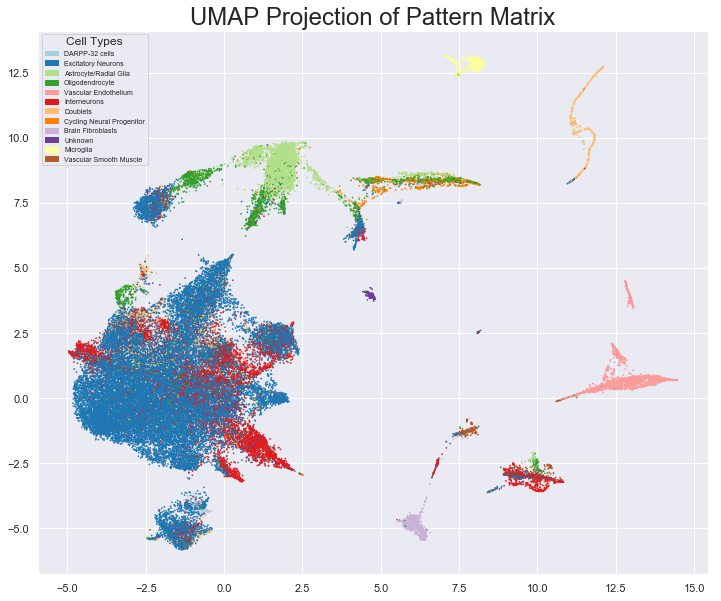

In [3]:
plt.rcParams['figure.figsize']= [12, 10]
scProject.viz.UMAP_Projection(dataset_filtered, 'CellType', 'VascEndo', 'UMAPVasc', 20)

Here we are going to pick features 9, 10, and 38 as they appear to have the highest pearson value for vasc. endo.

Number of nonzero cells 8336


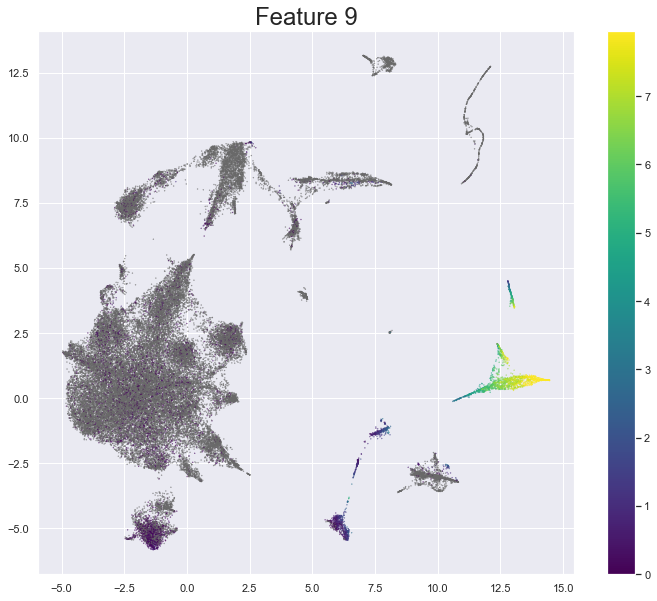

Number of nonzero cells 7568


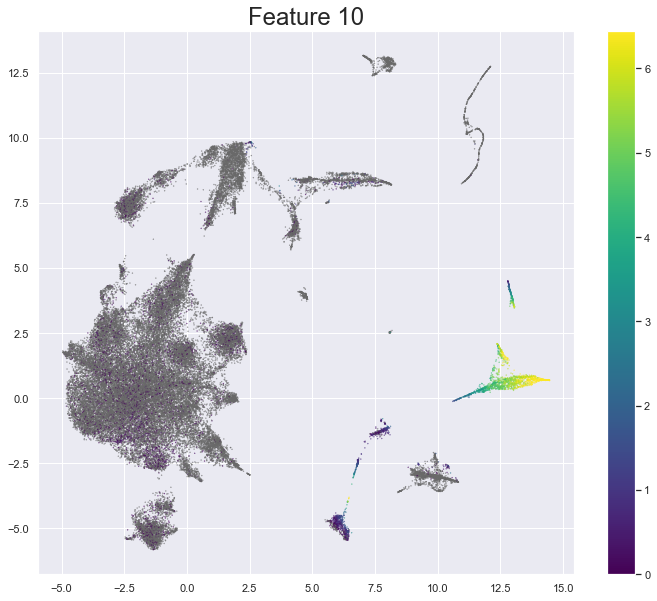

Number of nonzero cells 13546


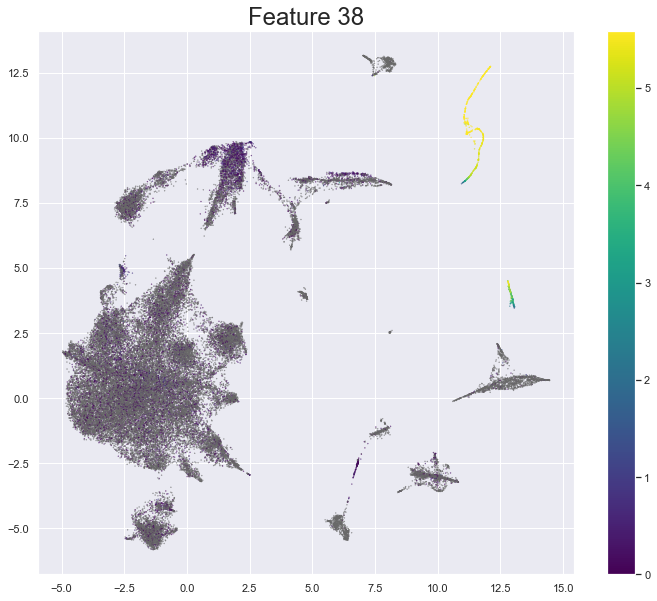

In [4]:
scProject.viz.featurePlots(dataset_filtered, [9, 10, 38], 'VascEndo', 'UMAPVasc')

Here we see that features 9 and 10 are very clear markers of vascular endothelium in the P6 mouse cortex. Feature 9 and 10 light up the vascular endothelium in the bottom right corner and the small cluster in the middle left. Now, lets run a new regression, but with more lasso. This will force the model to pick the strongest features to see which features are the strongest drivers of vascular endothelium. Here we are going to make it 50% lasso.

(55371, 80)
[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


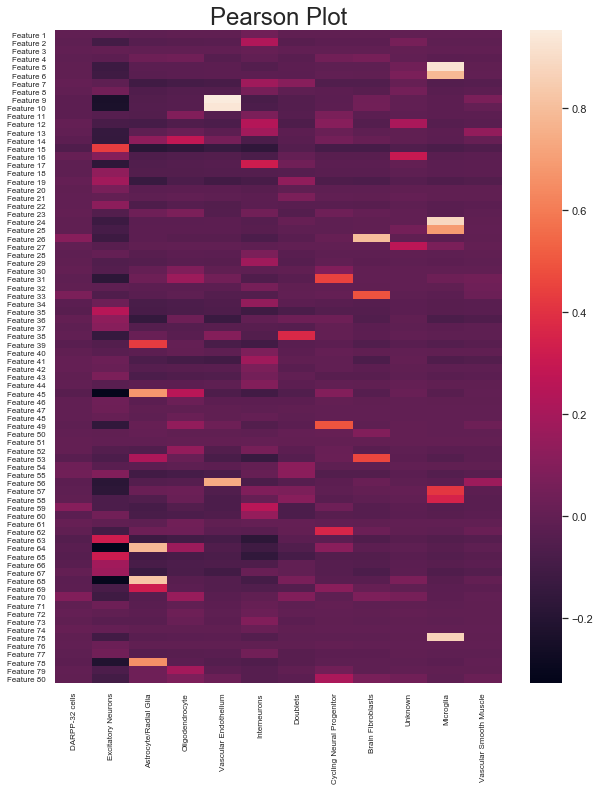

[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


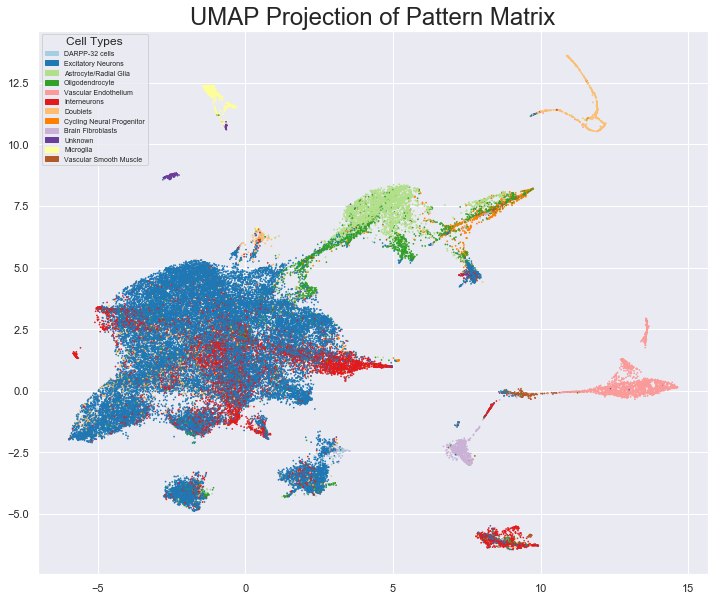

Number of nonzero cells 4366


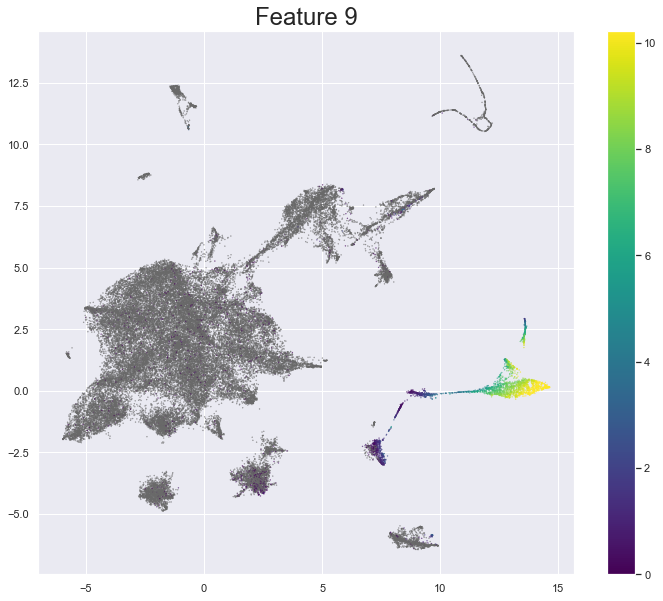

Number of nonzero cells 3611


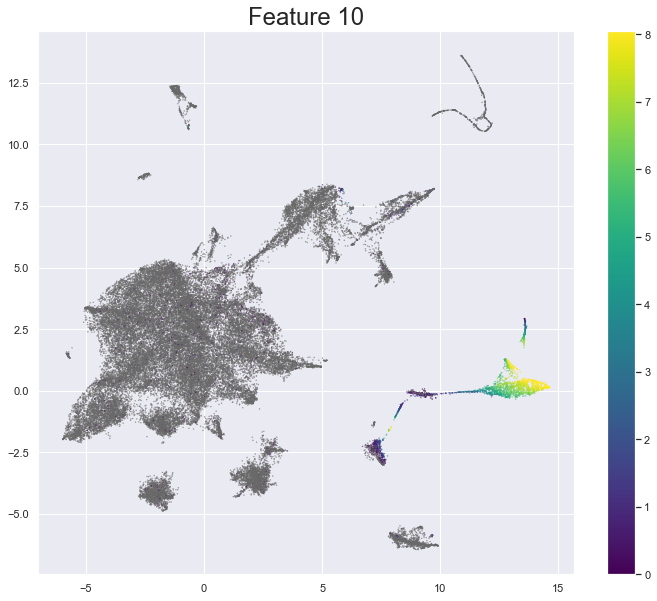

Number of nonzero cells 10769


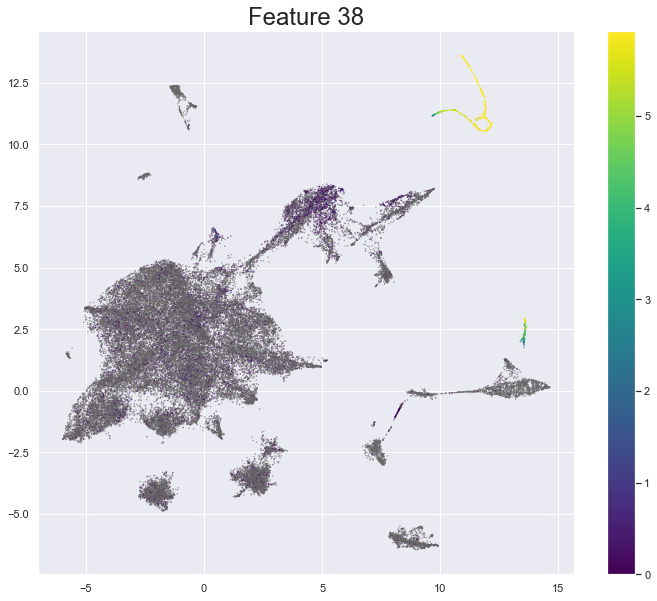

In [5]:
plt.rcParams['figure.figsize']= [10, 12]
scProject.rg.NNLR_ElasticNet(dataset_filtered, patterns_filtered, 'VascEndo50', .001, .5)
scProject.viz.pearsonMatrix(dataset_filtered, patterns_filtered, 'CellType', 12, 'VascEndo50', 'PearsVasc50', True, row_cluster=False, col_cluster=False)
plt.rcParams['figure.figsize']= [12, 10]
scProject.viz.UMAP_Projection(dataset_filtered, 'CellType', 'VascEndo50', 'UMAPVasc50', 20)
scProject.viz.featurePlots(dataset_filtered, [9, 10, 38], 'VascEndo50', 'UMAPVasc50')


Feature 9 and 10 stay robust markers and feature 38 persists in those few cells. Let's up the lasso even further to 90%. This encourages even more sparsity and will hopefully confirm that features 9 and 10 are robust markers of vascular endothelium in the P6 mouse cortex.

(55371, 80)
[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


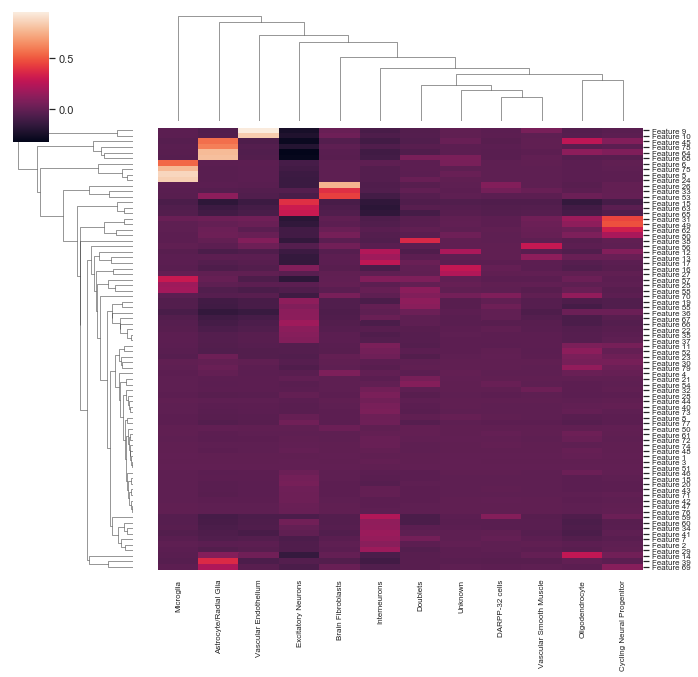

[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


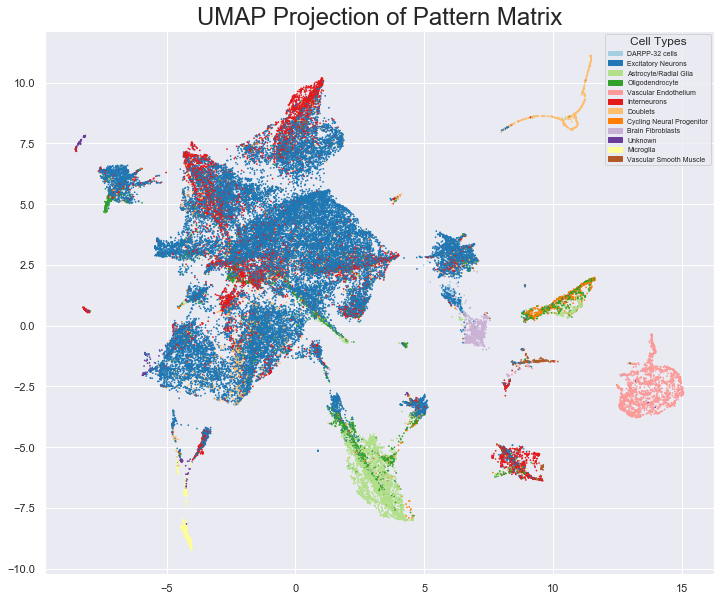

Number of nonzero cells 3050


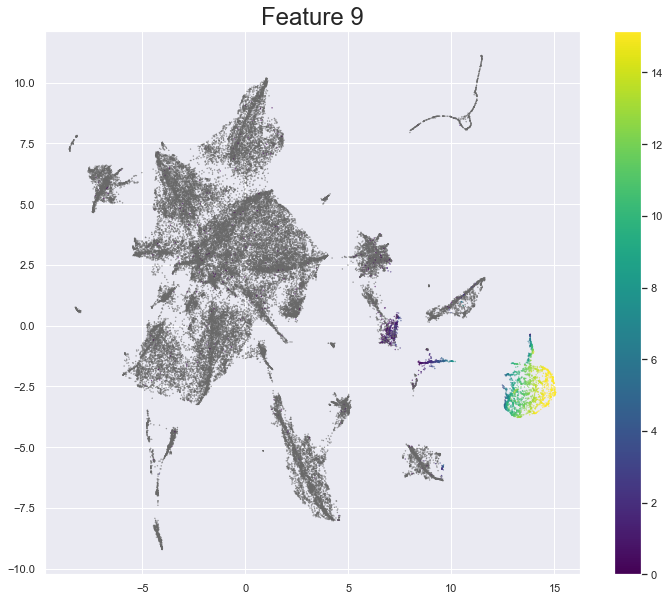

Number of nonzero cells 2371


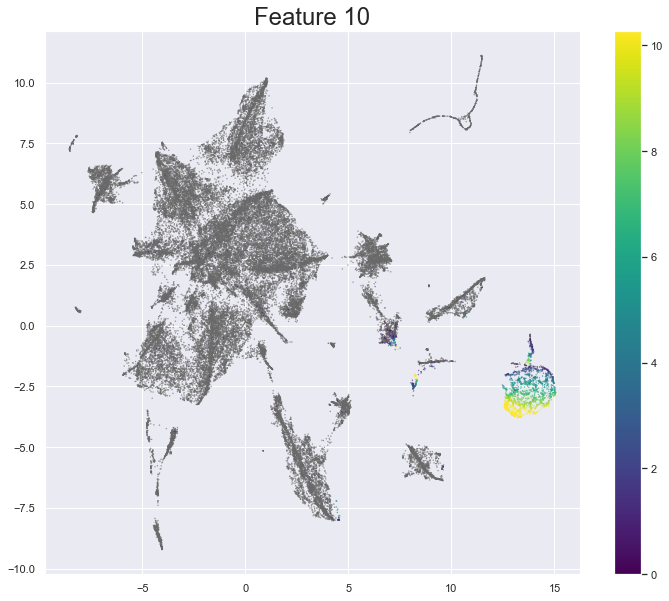

Number of nonzero cells 8917


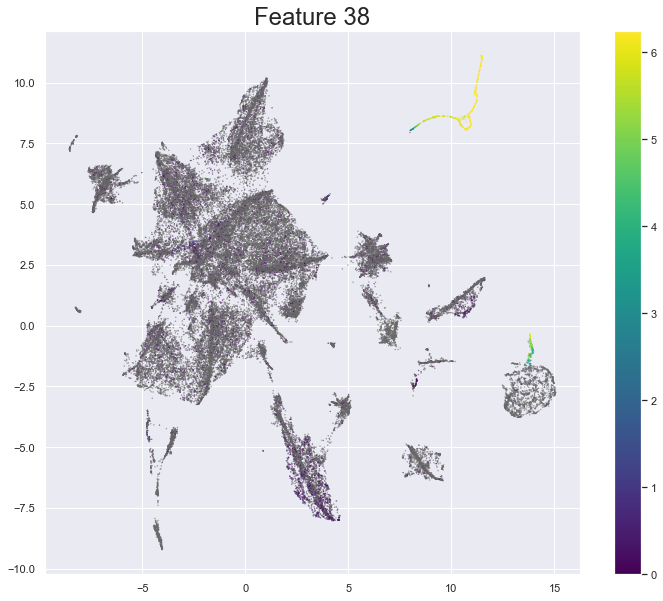

In [6]:
plt.rcParams['figure.figsize']= [10, 12]
scProject.rg.NNLR_ElasticNet(dataset_filtered, patterns_filtered, 'VascEndo90', .001, .9)
scProject.viz.pearsonMatrix(dataset_filtered, patterns_filtered, 'CellType', 12, 'VascEndo90', 'PearsVasc90', True)
plt.rcParams['figure.figsize']= [12, 10]
scProject.viz.UMAP_Projection(dataset_filtered, 'CellType', 'VascEndo90', 'UMAPVasc90', 20)
scProject.viz.featurePlots(dataset_filtered, [9, 10, 38], 'VascEndo90', 'UMAPVasc90')

Lastly, check the highly expressed genes in the features of interest to get some sense of what the feature does and if it makes sense biologically.

In [7]:
print(scProject.stats.importantGenes(patterns_filtered, 9, .1), "Feature 9 Genes")
print(scProject.stats.importantGenes(patterns_filtered, 10, .1), "Feature 10 Genes")
print(scProject.stats.importantGenes(patterns_filtered, 38, .5), "Feature 38 Genes")

[Index(['ENSMUSG00000016494', 'ENSMUSG00000032698', 'ENSMUSG00000049775',
       'ENSMUSG00000074457', 'ENSMUSG00000007872', 'ENSMUSG00000032766',
       'ENSMUSG00000051855', 'ENSMUSG00000079523', 'ENSMUSG00000000031',
       'ENSMUSG00000018593', 'ENSMUSG00000001175'],
      dtype='object', name='index')] Feature 9 Genes
[Index(['ENSMUSG00000016494', 'ENSMUSG00000049775', 'ENSMUSG00000032766',
       'ENSMUSG00000051855', 'ENSMUSG00000079523', 'ENSMUSG00000000031',
       'ENSMUSG00000018593'],
      dtype='object', name='index')] Feature 10 Genes
[Index(['ENSMUSG00000069919'], dtype='object', name='index')] Feature 38 Genes


Now these are ensemble ids so I just used https://www.syngoportal.org/convert.html to convert them to gene names.
<br>
For Feature 9: <br>
ENSMUSG00000016494	CD34 antigen <br>
ENSMUSG00000032766	guanine nucleotide binding protein (G protein), gamma 11 <br>
ENSMUSG00000000031	H19, imprinted maternally expressed transcript <br>
ENSMUSG00000007872	inhibitor of DNA binding 3<br>
ENSMUSG00000051855	mesoderm specific transcript<br>
ENSMUSG00000018593	secreted acidic cysteine rich glycoprotein<br>
ENSMUSG00000079523	thymosin, beta 10<br>
ENSMUSG00000049775	thymosin, beta 4, X chromosome<br>
<br>
For Feature 10:<br>
ENSMUSG00000016494	CD34 antigen<br>
ENSMUSG00000032766	guanine nucleotide binding protein (G protein), gamma 11<br>
ENSMUSG00000000031	H19, imprinted maternally expressed transcript<br>
ENSMUSG00000032698	LIM domain only 2	Lmo2<br>
ENSMUSG00000051855	mesoderm specific transcript<br>
ENSMUSG00000046402	retinol binding protein 1, cellular<br>
ENSMUSG00000018593	secreted acidic cysteine rich glycoprotein<br>
ENSMUSG00000079523	thymosin, beta 10<br>
ENSMUSG00000049775	thymosin, beta 4, X chromosome<br>
<br>
For Feature 38:<br>
ENSMUSG00000069919	hemoglobin alpha, adult chain 1<br>
<br>
It is worth noting that both feature 9 and 10 have mesoderm specific transcript. This makes sense as vascular endothelium originates in the mesoderm. Also, if you lower the threshold in the important genes method you will see more genes that make biological sense for 9 and 10 being expressed in vascular endothelium.
<br>
For feature 38, since its highest expressed gene is hemoglobin, it would make sense that it is a marker for erythrocytes. It's usage in the doublets makes perfect sense as red blood cells are often in doublets because of their relative size.
<br>
While it is not a new finding that erythrocytes are in doublets or that vascular endothelium originates in the mesoderm, these examples of recapitulating known biology serves as evidence that scProject is capturing biological processes.

scProject can be used to show the distribution of mesoderm specific transcript across features. It can also show which features are chosen by the model to contribute to the mesoderm transcript of expression in the samples.

Feature 9 expresses 7.491752505302429% of gene ENSMUSG00000051855
Feature 10 expresses 4.985912516713142% of gene ENSMUSG00000051855


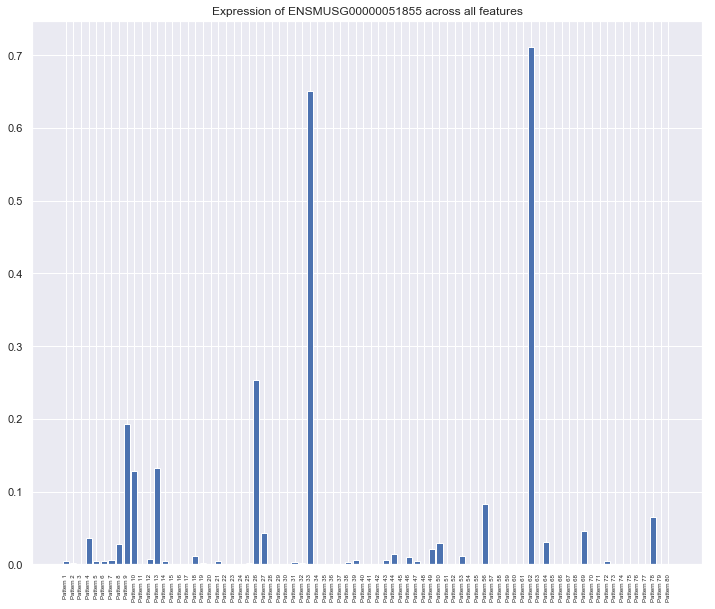

(1810, 80)


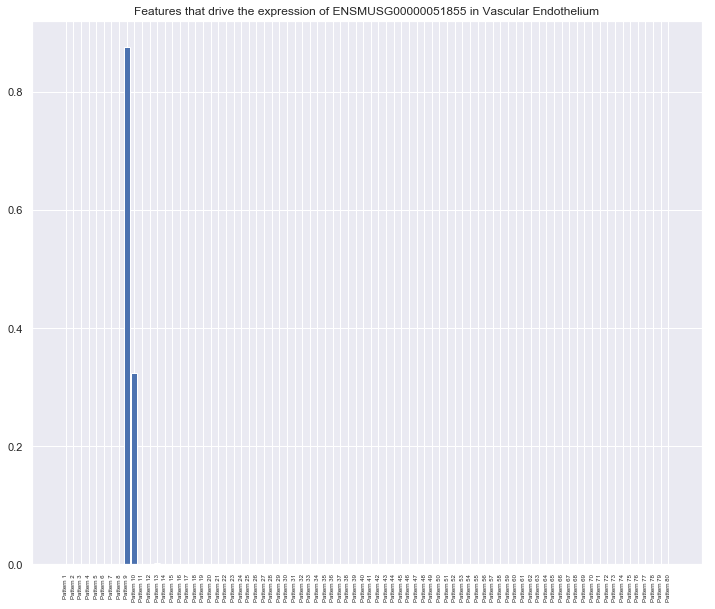

In [8]:
scProject.stats.geneSelectivity(patterns_filtered, 'ENSMUSG00000051855', 9, False) # mesoderm
scProject.stats.geneSelectivity(patterns_filtered, 'ENSMUSG00000051855', 10, True)
scProject.stats.geneDriver(dataset_filtered, patterns_filtered, 'ENSMUSG00000051855', 'CellType',
                                       "Vascular Endothelium", "VascEndo90")


These two plots show how there are plenty of features that express mesoderm specific transcript, but features 9 and 10 were chosen by the model because of the collection and the respecting weighting of the genes, not just mesoderm specific transcript. Below, we will examine Feature 38 and hemaglobin alpha, adult chain 1.

Feature 38 expresses 82.65706300735474% of gene ENSMUSG00000069919


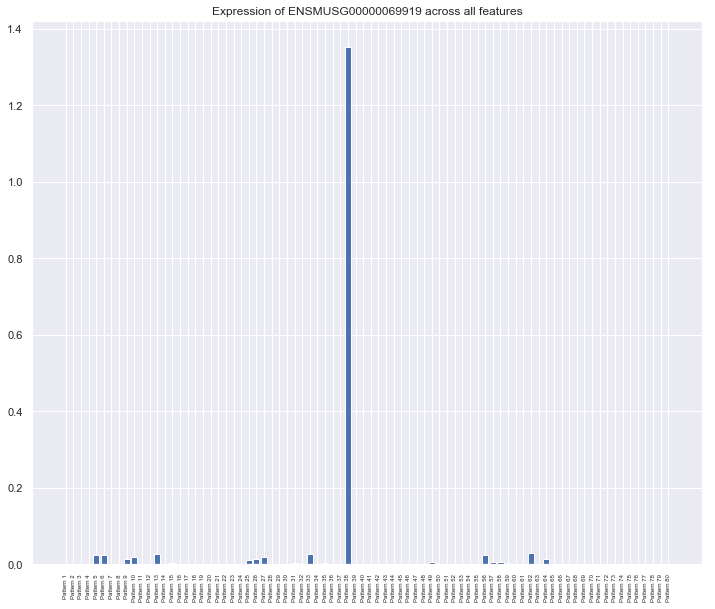

(1810, 80)


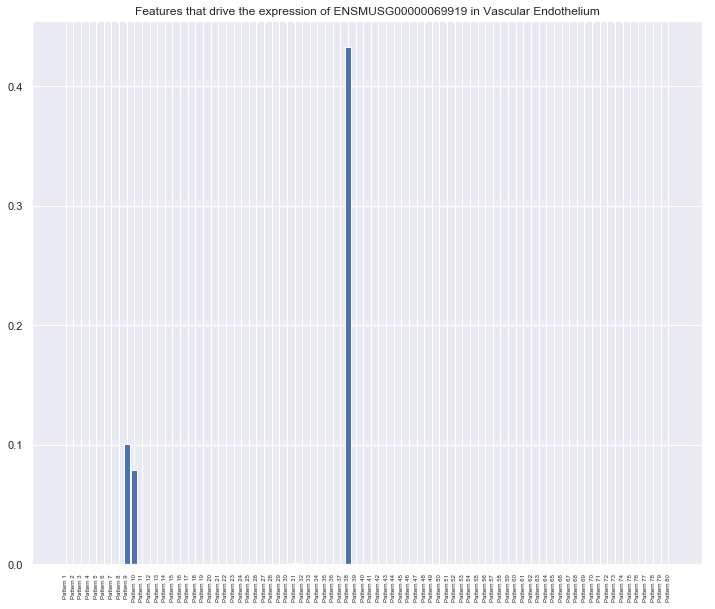

In [9]:
scProject.stats.geneSelectivity(patterns_filtered, 'ENSMUSG00000069919', 38, True) #Hemoglobin
scProject.stats.geneDriver(dataset_filtered, patterns_filtered, 'ENSMUSG00000069919', 'CellType',
                                       "Vascular Endothelium", "VascEndo90")

The first plot that feature 38 has by far the highest expression of the gene, but the second plot shows that features 9 and 10 are also contributing to the expression of the gene in the sample as the plot is adjusted by actual usage of the features.